In [13]:
import pandas as pd

df=pd.read_csv('c:/data/rides/rides2.csv')
df

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1
...,...,...,...,...,...,...,...,...
495,0,0,11.052577,90,72,68,90,0
496,1,0,8.187740,91,83,82,91,0
497,0,2,45.177402,95,92,85,93,1
498,0,3,27.088380,83,83,80,88,1


In [2]:
df['overall'].value_counts()

overall
1    255
0    245
Name: count, dtype: int64

In [3]:
train_cols=df.columns[:-1]

X=df[train_cols]
y=df['overall']

In [4]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["overall"])
df2 = pd.concat([X_samp, y_samp], axis=1)

df2["overall"].value_counts()

overall
0    245
1    245
Name: count, dtype: int64

In [6]:
X = X_samp[train_cols]  # 독립변수
y = y_samp["overall"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=10
)

In [8]:
# splitter {best, random}, default=best
# 각 노드에서 분할을 선택하는 데 사용된 전략
# best : 최선의 변수를 선택하는 방식(랜덤포레스트에서 사용하는 방식)
# random : 무작위로 변수를 선택하는 방식(엑스트라 트리에서 사용하는 방식)

from sklearn.tree import DecisionTreeClassifier

# 트리 모형 생성(기본옵션)

model1 = DecisionTreeClassifier(splitter="best", max_depth=3, random_state=0)
model1.fit(X_train, y_train)

print("학습용: ", model1.score(X_train, y_train))
print("검증용: ", model1.score(X_test, y_test))

학습용:  0.8494897959183674
검증용:  0.7857142857142857


In [9]:
# 무작위 분할을 선택하는 방식
model2 = DecisionTreeClassifier(splitter="random", max_depth=3, random_state=0)
model2.fit(X_train, y_train)

print("학습용: ", model2.score(X_train, y_train))
print("검증용: ", model2.score(X_test, y_test))

학습용:  0.7270408163265306
검증용:  0.7244897959183674


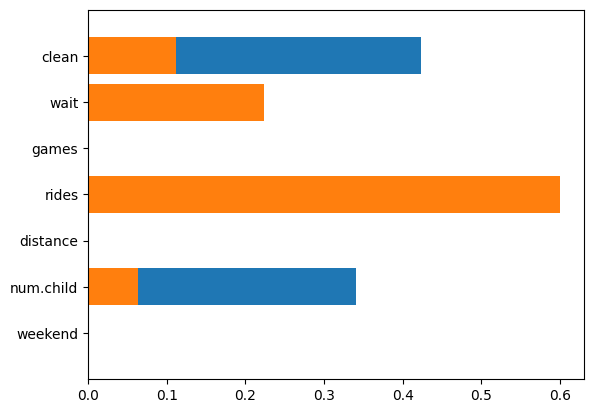

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def plot_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), train_cols)
    plt.ylim(-1, n_features)


# 특성 중요도
plot_tree(model1)
plot_tree(model2)